In [1]:
import pandas as pd
import os
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sbn
import pickle

/Users/joeywilkes/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
path = '../research_data/metric_comparison_2_19_data/'


['metric_comparison_experiments_2_19_3_21.csv',
 'metric_comparison_experiments_2_19_9_55.csv',
 'metric_comparison_experiments_2_19_3_20.csv',
 'metric_comparison_experiments_2_19_6_38.csv',
 'metric_comparison_experiments_2_19_5_43.csv',
 'metric_comparison_experiments_2_19_6_12.csv',
 'metric_comparison_experiments_2_19_5_42.csv',
 'metric_comparison_experiments_2_19_3_18.csv',
 'metric_comparison_experiments_2_19_10_26.csv',
 'metric_comparison_experiments_2_19_5_37.csv',
 'metric_comparison_experiments_2_19_9_37.csv',
 'metric_comparison_experiments_2_19_3_40.csv',
 'metric_comparison_experiments_2_19_3_54.csv',
 'metric_comparison_experiments_2_19_10_9.csv',
 'metric_comparison_experiments_2_19_9_7.csv',
 'metric_comparison_experiments_2_19_8_51.csv',
 'metric_comparison_experiments_2_19_10_1.csv',
 'metric_comparison_experiments_2_19_5_48.csv',
 'metric_comparison_experiments_2_19_6_8.csv',
 'metric_comparison_experiments_2_19_11_0.csv',
 'metric_comparison_experiments_8.csv',
 

In [78]:
results = dict()
for i,f in enumerate(os.listdir(path)):
    df = pd.read_csv(path + f)
    results[i] = {'file':f,'net':df.net.unique()[0],'adj_size':df.adj_size.unique()[0]
                 ,'shape':df.shape[0]
                 ,'gamma' : df.gamma.unique()[0],
                'sigma' : df.sigma.unique()[0],
                'spect_rad' : df.spect_rad.unique()[0],
                'ridge_alpha' : df.ridge_alpha.unique()[0],
                'remove_p' : df.remove_p.unique()[0],}
    
files = pd.DataFrame(results).T
# takes one second to run
files

,file,net,adj_size,shape,gamma,sigma,spect_rad,ridge_alpha,remove_p
0,metric_comparison_experiments_2_19_3_21.csv,erdos,500,640,10.0,0.14,1.0,0.0,0.99
1,metric_comparison_experiments_2_19_9_55.csv,erdos,2500,640,10.0,0.14,1.0,0.0,0.99
2,metric_comparison_experiments_2_19_3_20.csv,watts2,500,640,5.0,0.14,2.0,0.0,0.98
3,metric_comparison_experiments_2_19_6_38.csv,no_edges,1500,640,25.0,0.4,2.0,0.0001,0
4,metric_comparison_experiments_2_19_5_43.csv,watts2,1500,640,5.0,0.14,2.0,0.0,0.98
5,metric_comparison_experiments_2_19_6_12.csv,geom,1500,640,5.0,0.4,50.0,0.0001,0.99
6,metric_comparison_experiments_2_19_5_42.csv,loop,1500,640,5.0,0.14,10.0,0.01,0.5
7,metric_comparison_experiments_2_19_3_18.csv,barab1,500,640,5.0,0.14,0.9,0.0001,0.1
8,metric_comparison_experiments_2_19_10_26.csv,no_edges,2500,640,25.0,0.4,2.0,0.0001,0
9,metric_comparison_experiments_2_19_5_37.csv,barab1,1500,640,5.0,0.14,0.9,0.0001,0.9


In [10]:
files.sort_values(by=['net','adj_size'],ascending=[True,True],inplace=True)
files

,file,net,adj_size,shape
7,metric_comparison_experiments_2_19_3_18.csv,barab1,500,640
21,metric_comparison_experiments_15.csv,barab1,500,640
9,metric_comparison_experiments_2_19_5_37.csv,barab1,1500,640
17,metric_comparison_experiments_2_19_5_48.csv,barab1,1500,640
10,metric_comparison_experiments_2_19_9_37.csv,barab1,2500,640
15,metric_comparison_experiments_2_19_8_51.csv,barab1,2500,640
0,metric_comparison_experiments_2_19_3_21.csv,erdos,500,640
22,metric_comparison_experiments_2_19_6_35.csv,erdos,1500,640
1,metric_comparison_experiments_2_19_9_55.csv,erdos,2500,640
23,metric_comparison_experiments_2_19_3_39.csv,geom,500,640


In [47]:
df.iloc[:1].shape
df.iloc[:2]

,Unnamed: 0,prediction,true,pred,accuracy_duration,their_score,our_diff,hybrid_diff,adj_size,net,topo_p,gamma,sigma,spect_rad,ridge_alpha,remove_p,x0,rc_counter,compute time (Min)
0,0,[[ 8.63051721 8.70666738 8.78330314...,[[ 8.70272666 8.77898519 8.8557171 ... 13.6...,1340,1.2194,1.61161,[1.72526924e-01 1.72575747e-01 1.72613517e-01 ...,[7.84962011e-03 7.78727212e-03 7.72497695e-03 ...,2500,watts2,0.5,5.0,0.14,2.0,1.000000e-08,0.98,[ 15.89043505 18.60495455 -12.81231496],0,0.716906


In [55]:
df.iloc[:2][['accuracy_duration','their_score','adj_size']].melt()

,variable,value
0,accuracy_duration,1.21940
1,accuracy_duration,1.71353
2,their_score,1.61161
3,their_score,4.16780
4,adj_size,2500.00000
5,adj_size,2500.00000


In [71]:
topo_names = {
             'barab1':'Barabasi-Albert 1'
             ,'barab2':'Barabasi-Albert 2'
             ,'erdos':'Erdos-Reyni'
             ,'random_digraph':'Random Directed'
             ,'ident':'Identity'
             ,'watts2':'Watts-Strogatz 2'
             ,'watts4':'Watts-Strogatz 4'
             ,'watts3':'Watts-Strogatz 3'
             ,'watts5':'Watts-Strogatz 5'
             ,'geom':'Random Geometric'
             ,'no_edges':'No Edges'
             ,'loop':'Loop'
             ,'chain':'Chain'
         }

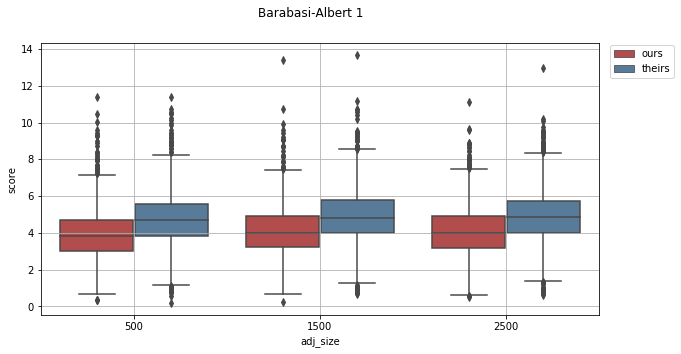

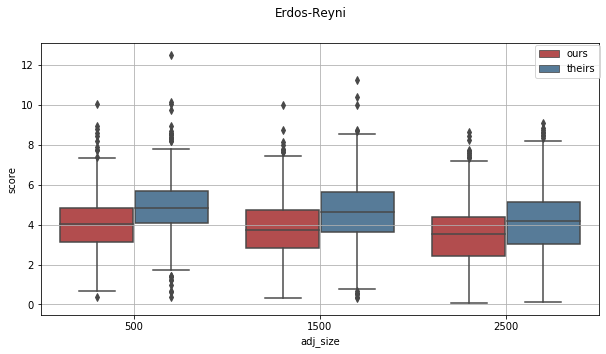

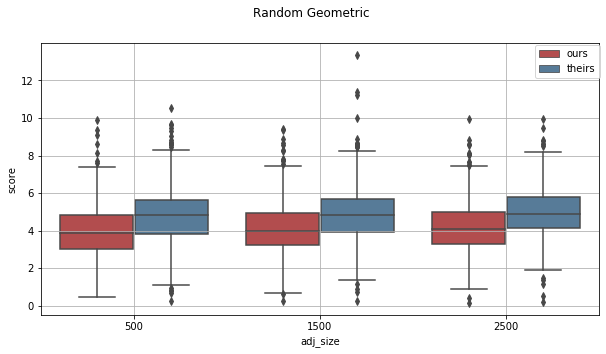

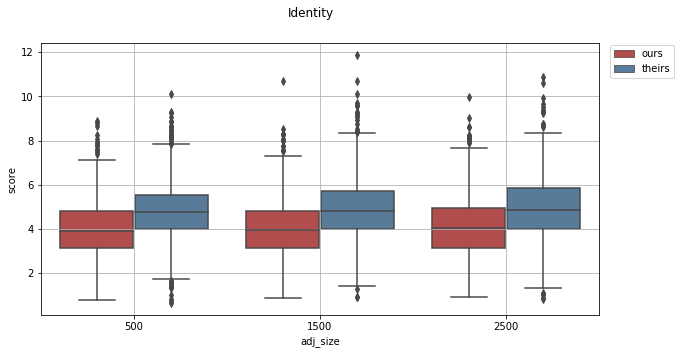

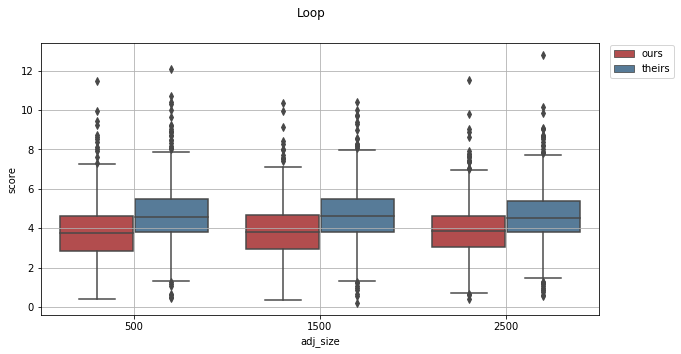

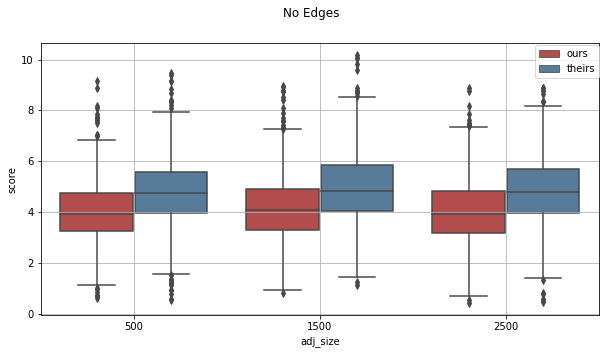

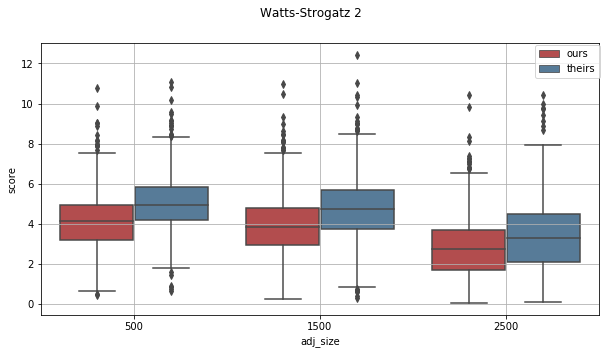

In [76]:
for TOPOLOGY in files.net.unique():
    x = pd.DataFrame()
    for f in list(files.loc[files.net == TOPOLOGY]['file']):
        temp = pd.read_csv(path + f)
        x = pd.concat([temp,x])

    ## one way
    #fig,ax = plt.subplots(1,1,figsize=(10,5))
    #df.boxplot(column=['accuracy_duration','their_score'],by='adj_size',ax=ax)
    #fig.suptitle(str(df.net.unique()[0]))
    #plt.show()
    
    d2 = x[['adj_size','accuracy_duration']].copy()
    d3 = x[['adj_size','their_score']].copy()
    d2.rename(columns={'accuracy_duration':'score'},inplace=True)
    d3.rename(columns={'their_score':'score'},inplace=True)
    d2['Metric'] = 'ours'
    d3['Metric'] = 'theirs'
    y = pd.concat([d2,d3]).copy()
    
    fig,ax = plt.subplots(1,1,figsize=(10,5))
    sbn.boxplot(x="adj_size",y='score', hue='Metric',data=y,ax=ax,palette="Set1",saturation=0.5)
    fig.suptitle(topo_names[x.net.unique()[0]])
    plt.legend(bbox_to_anchor=(1.01,1.01))
    plt.grid(True)
    plt.show()
    

# ALL CELLS BELOW WERE TO PRACTICE creating the above plot

In [36]:
x = pd.DataFrame()
for f in list(files.loc[files.net == 'erdos']['file']):
    temp = pd.read_csv(path + f)
    x = pd.concat([temp,x])

/Users/joeywilkes/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/boxplot.py:396: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  **kwds,


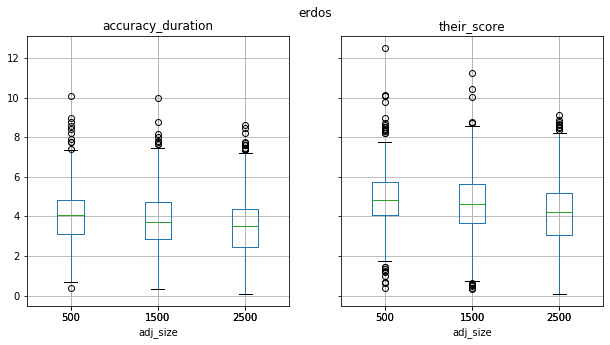

In [39]:
fig,ax = plt.subplots(1,1,figsize=(10,5))
x.boxplot(column=['accuracy_duration','their_score'],by='adj_size',ax=ax,layout=(1,2))
fig.suptitle(str(x.net.unique()[0]))
plt.show()

In [60]:
d2 = x[['adj_size','accuracy_duration']].copy()
d3 = x[['adj_size','their_score']].copy()
d2.rename(columns={'accuracy_duration':'score'},inplace=True)
d3.rename(columns={'their_score':'score'},inplace=True)
d2['metric'] = 'ours'
d3['metric'] = 'theirs'
y = pd.concat([d2,d3])

In [58]:
# fig, ax = plt.subplots(1,3,figsize=(10,5))
# for i,s in enumerate([500,1500,2500]):
#     x.loc[x.adj_size == s].boxplot(column=['accuracy_duration','their_score'],by='adj_size',ax=ax[i])
#     ax[i].set_title(f'size={s}')
    

In [63]:
y.columns

Index(['adj_size', 'score', 'metric'], dtype='object')

In [65]:
y.metric.value_counts()

ours      1920
theirs    1920
Name: metric, dtype: int64

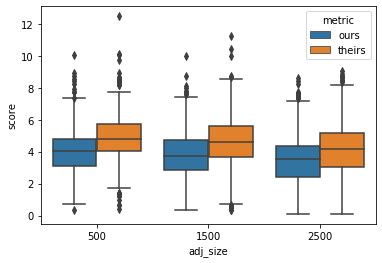

In [67]:
sbn.boxplot(x="adj_size",y='score', hue='metric', data=y)
# sbn.boxplot(x="adj_size",y='score', hue='metric', data=y,palette="Set1",saturation=0.5)

In [ ]:
width = 13 #the x
height = 5 #the y 
plt.figure(figsize=(width,height))
#https://github.com/mwaskom/seaborn/issues/720 #where I got the idea
ax = sns.boxplot(x="adj_size", y="pred", data=df,palette="Set1",saturation=0.5)
# handles, _ = ax.get_legend_handles_labels()
# ax.legend(handles, ["Not Thinned", "Thinned"],bbox_to_anchor=(1.01,1.02))
# plt.title('Prediction Distribution of Best Models',y=1.03,fontsize=16)
# plt.xlabel('Topology',labelpad=10,fontsize=14)
# plt.ylabel('Prediction',labelpad=10,fontsize=14)
# ax.set_facecolor('ivory') #ivory & beige,xkcd:beige,azure,khaki